# Week10 - Lab

* Use PCA to reduce dimentionality and use a linear regression to predict
* Use t-SNE to visualize

In [3]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']
print(cancer.target_names)

['malignant' 'benign']


In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 455
Test examples: 114


In [8]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)


model = LinearRegression()
model.fit(X_train_pca, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test_pca)
score = model.score(X_test_pca, y_test)
score

0.5146556661557815

In [43]:
tsne_model = TSNE(n_components=2, 
            init='random', 
            learning_rate='auto', 
            perplexity=30)

tsne = tsne_model.fit_transform(X)

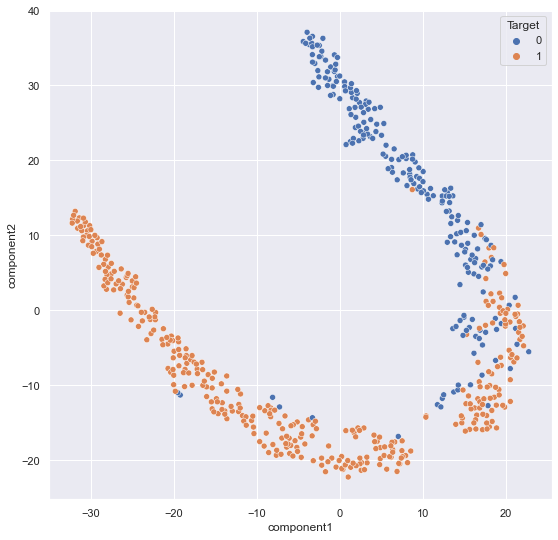

In [45]:
import pandas as pd
tsne_df = pd.DataFrame(tsne)
#tsne_df.index = X.index.tolist()
tsne_df.columns = ['component1', 'component2']

tsne_df = pd.concat([tsne_df,pd.DataFrame(y,columns=['Target'])], axis=1)

import seaborn as sns

sns.set(rc={'figure.figsize':(9,9)})
sns.scatterplot(x='component1', y='component2', hue='Target', data=tsne_df)
plt.show()